https://data.humdata.org/dataset/landslide-mudslide-impact-in-mai-mahiu-and-kijabe-towns-kenya-as-of-1-may-2024

In [1]:
import geopandas as gpd
import pandas as pd
import yaml
from rasterio.crs import CRS
from pathlib import Path
import fiona
from shapely.ops import polygonize
from shapely.geometry import mapping, Polygon, shape
import glob

In [2]:
yaml_file = '../events/mai_mahiu_flood_and_landslides_2024.yml' #'porto_algre.yml'
with open(yaml_file) as f:
    event_dict = yaml.safe_load(f)["event"]
event_dict

{'event_name': 'mai_mahiu_flood_and_landslides_2024',
 'bounds': [15.19418162, -4.31842285, 15.31481366, -4.13558505],
 'event_date': '2024-04-29',
 'pre_event_window_days': 100,
 'post_event_window_days': 60,
 'rtc_track_numbers': [7, 109],
 'mgrs_tiles': ['33MWR'],
 'dist_hls_confirmed_change_min_days': 30,
 'source_id': 'UNOSAT via humanitarian data exchange - Pléiades image',
 'links': ['https://data.humdata.org/dataset/landslide-mudslide-impact-in-mai-mahiu-and-kijabe-towns-kenya-as-of-1-may-2024',
  'https://eos.org/thelandslideblog/mai-mahiu']}

In [8]:
shp_files = glob.glob('../external_validation_data/unosat/mai_mahui_flood_and_landslides/FL20240426KEN_SHP/*.shp')
shp_files

['../external_validation_data/unosat/mai_mahui_flood_and_landslides/FL20240426KEN_SHP/PL_20240501_LandslideMudslideExtent_MaiMahiu.shp',
 '../external_validation_data/unosat/mai_mahui_flood_and_landslides/FL20240426KEN_SHP/PL_20240501_AffectedStructure_MaiMahiu.shp',
 '../external_validation_data/unosat/mai_mahui_flood_and_landslides/FL20240426KEN_SHP/PL_20240505_FloodExtent_Garissa.shp',
 '../external_validation_data/unosat/mai_mahui_flood_and_landslides/FL20240426KEN_SHP/PL_20240501_Affectedbridge_Nairobi_Kiambu.shp',
 '../external_validation_data/unosat/mai_mahui_flood_and_landslides/FL20240426KEN_SHP/S2_20240429_WaterExtent_AlongTanaRiver_GalanaRiver.shp',
 '../external_validation_data/unosat/mai_mahui_flood_and_landslides/FL20240426KEN_SHP/PL_20240501_FloodExtent_Nairobi_Kiambu.shp',
 '../external_validation_data/unosat/mai_mahui_flood_and_landslides/FL20240426KEN_SHP/VIIRS_20240424_20240428_AnalysisExtent_Kenya.shp',
 '../external_validation_data/unosat/mai_mahui_flood_and_landsl

In [37]:
paths = ['../external_validation_data/unosat/mai_mahui_flood_and_landslides/FL20240426KEN_SHP/PL_20240501_LandslideMudslideExtent_MaiMahiu.shp', 
         '../external_validation_data/unosat/mai_mahui_flood_and_landslides/FL20240426KEN_SHP/PL_20240501_FloodExtent_Nairobi_Kiambu.shp'
         ]


In [39]:
dfs = [gpd.read_file(p).to_crs(4326)[['geometry']] for p in paths]
df_event = pd.concat(dfs, axis=0)
df_event.head()

,geometry
0,"MULTIPOLYGON (((36.57978 -0.98891, 36.57977 -0..."
0,"MULTIPOLYGON (((37.06500 -1.31769, 37.06500 -1..."


In [41]:
df_event.total_bounds

array([36.56645031, -1.32126631, 37.13272135, -0.92335618])

In [42]:
# df_flood_coastal = df_flood.cx[89.2:91, 21.5: 24].reset_index(drop=True)
# df_flood_coastal.explore()

In [43]:
n = df_event.shape[0]
df_event_f = gpd.GeoDataFrame({'name': [event_dict['event_name'] for k in range(n)],
                               'date': [pd.to_datetime(event_dict['event_date']) for k in range(n)],
                               'source_id': [f'{event_dict["source_id"]}' for k in range(n)]},
                              geometry=df_event.geometry.tolist(),
                              crs=CRS.from_epsg(4326))
df_event_f.head()

,name,date,source_id,geometry
0,mai_mahiu_flood_and_landslides_2024,2024-04-29,UNOSAT via humanitarian data exchange - Pléiad...,"MULTIPOLYGON (((36.57978 -0.98891, 36.57977 -0..."
1,mai_mahiu_flood_and_landslides_2024,2024-04-29,UNOSAT via humanitarian data exchange - Pléiad...,"MULTIPOLYGON (((37.06500 -1.31769, 37.06500 -1..."


<Axes: >

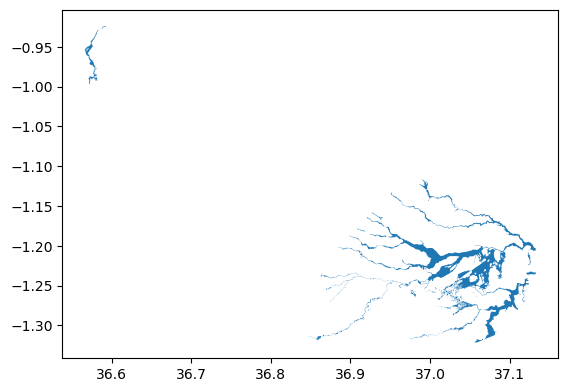

In [47]:
df_event_f.plot()

In [48]:
EXTERNAL_VAL_DATA_DIR = Path('../external_validation_data_db/')
EXTERNAL_VAL_DATA_DIR.mkdir(exist_ok=True, parents=True)

In [49]:
df_event_f.to_parquet(EXTERNAL_VAL_DATA_DIR / f'{event_dict["event_name"]}.parquet')

In [36]:
#df_event_f.to_file(EXTERNAL_VAL_DATA_DIR / f'{event_dict["event_name"]}.geojson', driver='GeoJSON')